In [1]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import librosa
import librosa.display
import numpy as np

In [2]:
acquatic_mammels = os.path.join('acquatic_mammels', '404314__mbari_mars__marine-mammal-community.mp3')
# not_acquatic_mammels = os.path.join('Audio', 'Cargo', '110.wav')

In [3]:
acquatic_mammels

'acquatic_mammels\\404314__mbari_mars__marine-mammal-community.mp3'

In [4]:
def load_audio_16k_mono_librosa(filename):
    # Load audio using librosa
    wav, sample_rate = librosa.load(filename, sr=None, mono=True)
    # Resample to 16000hz
    wav = librosa.resample(y=wav, orig_sr=sample_rate, target_sr=16000)
    return wav

In [5]:
wave_librosa = load_audio_16k_mono_librosa(acquatic_mammels)
# nwave_librosa = load_audio_16k_mono_librosa(not_acquatic_mammels)

print("Aquatic mammals audio shape:", wave_librosa.shape)
# print("Non-aquatic mammals audio shape:", nwave_librosa.shape)

Aquatic mammals audio shape: (120960,)


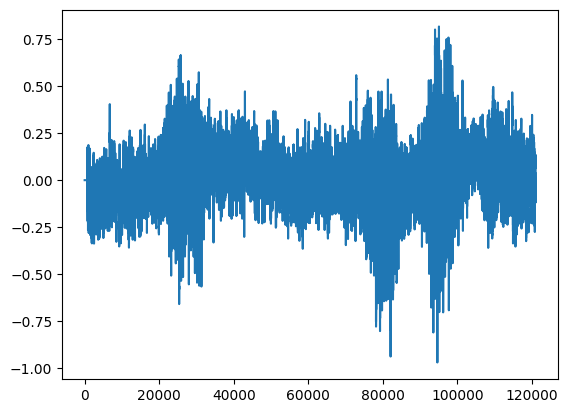

In [6]:
plt.plot(wave_librosa)
# plt.plot(nwave_librosa)
plt.show()

In [7]:
acquatic_mammels = os.path.join('D:\\RUAS\\1st_year_internship\\TCE\\Deep_waters\\acquatic_mammels')
natural_sounds = os.path.join('D:\\RUAS\\1st_year_internship\\TCE\\Deep_waters\\natural_sounds')
Other_anthropogenic = os.path.join('D:\\RUAS\\1st_year_internship\\TCE\\Deep_waters\\Other_anthropogenic')
vessels = os.path.join('D:\\RUAS\\1st_year_internship\\TCE\\Deep_waters\\vessels')

In [8]:
Acquatic_Mammels = tf.data.Dataset.list_files(acquatic_mammels+'/*.wav')
Natural_Sounds = tf.data.Dataset.list_files(natural_sounds+'/*.mp3')
Other_Anthropogenic = tf.data.Dataset.list_files(Other_anthropogenic+'/*.mp3')
Vessels = tf.data.Dataset.list_files(vessels+'/*.wav')

In [9]:
pos_Acquatic_Mammels = tf.data.Dataset.zip((Acquatic_Mammels, tf.data.Dataset.from_tensor_slices(tf.ones(len(Acquatic_Mammels)))))
pos_Natural_Sounds = tf.data.Dataset.zip((Natural_Sounds, tf.data.Dataset.from_tensor_slices(tf.ones(len(Natural_Sounds)))))
pos_Other_Anthropogenic = tf.data.Dataset.zip((Other_Anthropogenic, tf.data.Dataset.from_tensor_slices(tf.ones(len(Other_Anthropogenic)))))
pos_Vessels = tf.data.Dataset.zip((Vessels, tf.data.Dataset.from_tensor_slices(tf.ones(len(Vessels)))))

In [10]:
length1 = []
for file in os.listdir(os.path.join('acquatic_mammels')):
    tensor_wave = load_audio_16k_mono_librosa(os.path.join('acquatic_mammels', file))
    length1.append(len(tensor_wave))

In [11]:
tf.math.reduce_mean(length1)

<tf.Tensor: shape=(), dtype=int32, numpy=6106363>

In [12]:
tf.math.reduce_min(length1)

<tf.Tensor: shape=(), dtype=int32, numpy=120960>

In [13]:
tf.math.reduce_max(length1)

<tf.Tensor: shape=(), dtype=int32, numpy=47039925>

In [14]:
length2 = []
for file in os.listdir(os.path.join('natural_sounds')):
    tensor_wave = load_audio_16k_mono_librosa(os.path.join('natural_sounds', file))
    length2.append(len(tensor_wave))

In [15]:
tf.math.reduce_mean(length2)

<tf.Tensor: shape=(), dtype=int32, numpy=325352>

In [16]:
tf.math.reduce_min(length2)

<tf.Tensor: shape=(), dtype=int32, numpy=325352>

In [17]:
tf.math.reduce_max(length2)

<tf.Tensor: shape=(), dtype=int32, numpy=325352>

In [18]:
length3 = []
for file in os.listdir(os.path.join('Other_anthropogenic')):
    tensor_wave = load_audio_16k_mono_librosa(os.path.join('Other_anthropogenic', file))
    length3.append(len(tensor_wave))

In [19]:
tf.math.reduce_mean(length3)

<tf.Tensor: shape=(), dtype=int32, numpy=366601>

In [20]:
tf.math.reduce_min(length3)

<tf.Tensor: shape=(), dtype=int32, numpy=173568>

In [21]:
tf.math.reduce_max(length3)

<tf.Tensor: shape=(), dtype=int32, numpy=673920>

In [22]:
length4 = []
for file in os.listdir(os.path.join('vessels')):
    tensor_wave = load_audio_16k_mono_librosa(os.path.join('vessels', file))
    length4.append(len(tensor_wave))

In [23]:
tf.math.reduce_mean(length4)

<tf.Tensor: shape=(), dtype=int32, numpy=1503986>

In [24]:
tf.math.reduce_min(length4)

<tf.Tensor: shape=(), dtype=int32, numpy=96000>

In [25]:
tf.math.reduce_max(length4)

<tf.Tensor: shape=(), dtype=int32, numpy=4821766>

In [26]:
def preprocess(file_path, label): 
    wav = load_audio_16k_mono_librosa(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [39]:
filepath, label = pos_Acquatic_Mammels.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [40]:
spectrogram, label = preprocess(filepath, label)

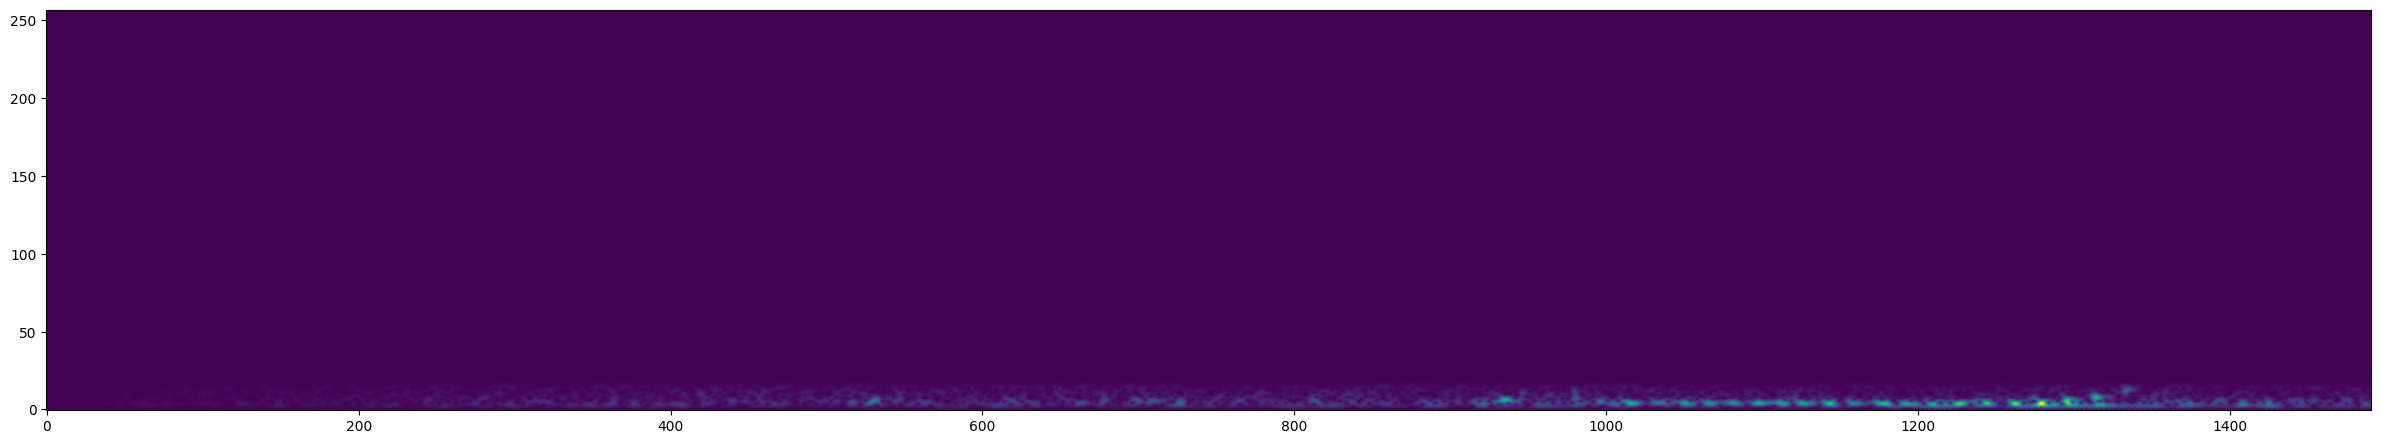

In [41]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0],origin="lower")
plt.show()

In [30]:
def feature_extraction(file_path):
    # load the audio file
    x, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    # extract features from the audio
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=50).T, axis=0)
    
    return mfcc

In [31]:
import resampy
features1={}
path="D:\\RUAS\\1st_year_internship\\TCE\\Deep_waters\\acquatic_mammels"
for file in os.listdir(path):
    file_path = os.path.join(path, file)
    features1[file] = feature_extraction(file_path)

In [32]:
features2={}
path="D:\\RUAS\\1st_year_internship\\TCE\\Deep_waters\\natural_sounds"
for file in os.listdir(path):
    file_path = os.path.join(path, file)
    features2[file] = feature_extraction(file_path)

In [33]:
features3={}
path="D:\\RUAS\\1st_year_internship\\TCE\\Deep_waters\\other_anthropogenic"
for file in os.listdir(path):
    file_path = os.path.join(path, file)
    features3[file] = feature_extraction(file_path)

In [34]:
features4={}
path="D:\\RUAS\\1st_year_internship\\TCE\\Deep_waters\\vessels"
for file in os.listdir(path):
    file_path = os.path.join(path, file)
    features4[file] = feature_extraction(file_path)

In [35]:
features1

{'369485__mbari_mars__earthquake-audible-only-with-appropriate-speakers.mp3': array([-320.92572   ,   56.343224  ,   14.882484  ,   34.525402  ,
          10.759204  ,   19.662718  ,    4.5611734 ,   13.239906  ,
           2.3073258 ,   11.243787  ,    3.0084217 ,   11.161287  ,
           1.0525559 ,    8.303018  ,    2.0287993 ,    7.4460173 ,
           0.88138926,    4.9068384 ,    1.2580787 ,    2.9636765 ,
           0.48616052,    3.3375063 ,    1.4709243 ,    1.9050163 ,
           2.3464196 ,    2.8002467 ,    3.0694222 ,    3.279769  ,
           3.994863  ,    2.2638447 ,    3.4808865 ,    1.8660916 ,
           2.5297353 ,    0.42358613,    2.4144356 ,    0.9623871 ,
           2.1284409 ,    1.1798046 ,    2.8444836 ,    1.1234872 ,
           1.9441872 ,    0.9915466 ,    2.1685085 ,    0.84083647,
           2.153512  ,    0.97395974,    1.5433352 ,    0.9560997 ,
           0.9913539 ,    0.45351696], dtype=float32),
 '369510__mbari_mars__blue-whale-d-calls-audible-onl

In [42]:
dataset1 = tf.data.Dataset.from_tensor_slices(features1)

In [44]:
dataset2 = tf.data.Dataset.from_tensor_slices(features2)

In [45]:
dataset3 = tf.data.Dataset.from_tensor_slices(features3)

In [46]:
dataset4 = tf.data.Dataset.from_tensor_slices(features4)

In [50]:
# dataset=dataset1.concatenate(dataset2)

In [38]:
data1 = data1.map(preprocess)
data1 = data1.cache()
data1 = data1.shuffle(buffer_size=1000)
data1 = data1.batch(16)
data1 = data1.prefetch(8)

NameError: name 'data1' is not defined